In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Function to parse multiple date formats
def parse_dates(date_str):
    #list of all format types in the dataframe
    formats = [
        "%d-%m-%Y %H:%M",  # day-month-year
        "%Y-%m-%dT%H:%M:%SZ",  # year-month-day, timezone
        "%m/%d/%Y %I:%M %p",  # month-day-year, time
    ]
    for fmt in formats:
        #check for match
        try:
            return pd.to_datetime(date_str, format=fmt)
        except ValueError:
            continue
    return pd.NaT  # Return NaT if none of the formats match

In [3]:
thingo = pd.read_csv(r'..\..\data\assignment_4\system_of_record_timestamps.csv')

thingo.head()

,Record_ID,Primary_Timestamp,Secondary_Timestamp,Tertiary_Timestamp,Event_Count
0,1,01-10-2024 00:00,NaN,NaN,1
1,2,2024-10-02T00:00:00Z,NaN,NaN,12
2,3,10/03/2024 12:00 AM,1727913600,NaN,12
3,4,10/04/2024 12:00 AM,1728000000,NaN,12
4,5,2024-10-05T00:00:00Z,NaN,NaN,13


In [4]:
thingo.loc[thingo['Event_Count'] == thingo.Event_Count.max()]

,Record_ID,Primary_Timestamp,Secondary_Timestamp,Tertiary_Timestamp,Event_Count
35,36,2024-11-05T00:00:00Z,NaN,NaN,400


In [5]:
#Create new dataframe to mess with
fixed_datetime = thingo.copy()
#use the parse_dates function to fix the datetime issues
fixed_datetime["Primary_Timestamp"] = fixed_datetime["Primary_Timestamp"].apply(parse_dates)
print(fixed_datetime.Primary_Timestamp) #looks good

#check for NA's
print(f"NA\'s: {sum((fixed_datetime.Primary_Timestamp == "NA") | (fixed_datetime.Primary_Timestamp == "NAN") | (fixed_datetime.Primary_Timestamp == "NaT"))}")

0    2024-10-01
1    2024-10-02
2    2024-10-03
3    2024-10-04
4    2024-10-05
        ...    
88   2024-12-28
89   2024-12-29
90   2024-12-30
91   2024-12-31
92   2025-01-01
Name: Primary_Timestamp, Length: 93, dtype: datetime64[ns]
NA's: 0


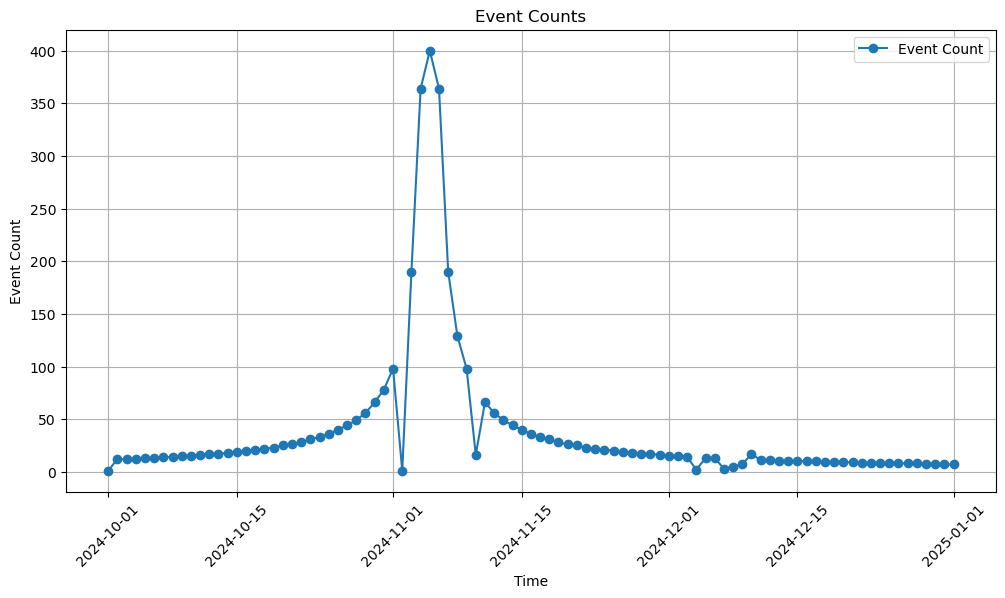

In [30]:
# Plot
plt.figure(figsize=(12, 6))
plt.plot(fixed_datetime['Primary_Timestamp'], fixed_datetime['Event_Count'], label="Event Count", marker='o', linestyle='-')
plt.xlabel("Time")
plt.ylabel("Event Count")
plt.title("Event Counts")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

#That looks like a ddos attack to me, but let's check z-scores

In [34]:
# Equation for Z-Score: z = (x-mu)/sigma
fixed_datetime['zscore'] = (fixed_datetime['Event_Count'] - fixed_datetime['Event_Count'].mean()) / (fixed_datetime['Event_Count'].std())

#Good cutoff: +- 2
#hold those in potential_weirdness
potential_weirdness = fixed_datetime[(fixed_datetime['zscore'] > 2) | (fixed_datetime['Z_Score'] < -2)]
potential_weirdness
#These event_counts are statistically significant, and thus are most likely the result of an attack

,Record_ID,Primary_Timestamp,Secondary_Timestamp,Tertiary_Timestamp,Event_Count,Z_Score,zscore
33,34,2024-11-03,3 days ago,Nov 3,190,2.163914,2.163914
34,35,2024-11-04,1730678400,NaN,364,4.645414,4.645414
35,36,2024-11-05,NaN,NaN,400,5.158828,5.158828
36,37,2024-11-06,0 days ago,NaN,364,4.645414,4.645414
37,38,2024-11-07,1730937600,2024-11,190,2.163914,2.163914
